# Explore here

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


In [303]:
#download data
url = 'https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv'
pd.read_csv(url, sep = ';', encoding= 'utf-8', quotechar= '"').to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False, encoding= 'utf-8')

In [304]:
#creates dataframe
df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [305]:
df[df['job'] == 'other'].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [307]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [308]:
#looking for invalid data
jobs = df['job'].unique()
education = df['education'].unique()
poutcome = df['poutcome'].unique()
marital = df['marital'].unique()


jobs, education, poutcome, marital

(array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['nonexistent', 'failure', 'success'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object))

In [309]:
#how many had hire a deposit
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [310]:
#what this illiterate section really means
df_iliterate = df[df['education'] == 'illiterate']
df_iliterate

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5393,45,blue-collar,married,illiterate,unknown,no,yes,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6928,45,blue-collar,married,illiterate,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
12383,51,admin.,married,illiterate,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
14445,55,blue-collar,married,illiterate,no,yes,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
14486,55,blue-collar,married,illiterate,no,no,no,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
16269,60,housemaid,married,illiterate,unknown,yes,no,cellular,jul,tue,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
17739,54,blue-collar,married,illiterate,unknown,yes,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
22402,45,blue-collar,married,illiterate,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
22642,44,blue-collar,married,illiterate,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
26680,34,self-employed,married,illiterate,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


In [311]:
df['education'].value_counts(normalize=True)


education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64

In [312]:
#group unknown and illiterate
df.loc[df['education'] == 'unknown', 'education'] = 'other'
df.loc[df['education'] == 'illiterate', 'education'] = 'other'
df['education'].value_counts(normalize=True)

education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
other                  0.042464
Name: proportion, dtype: float64

In [313]:
df.loc[df['job'] == 'unknown', 'job'] = 'other'
df['job'].value_counts(normalize=True)


job
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
other            0.008012
Name: proportion, dtype: float64

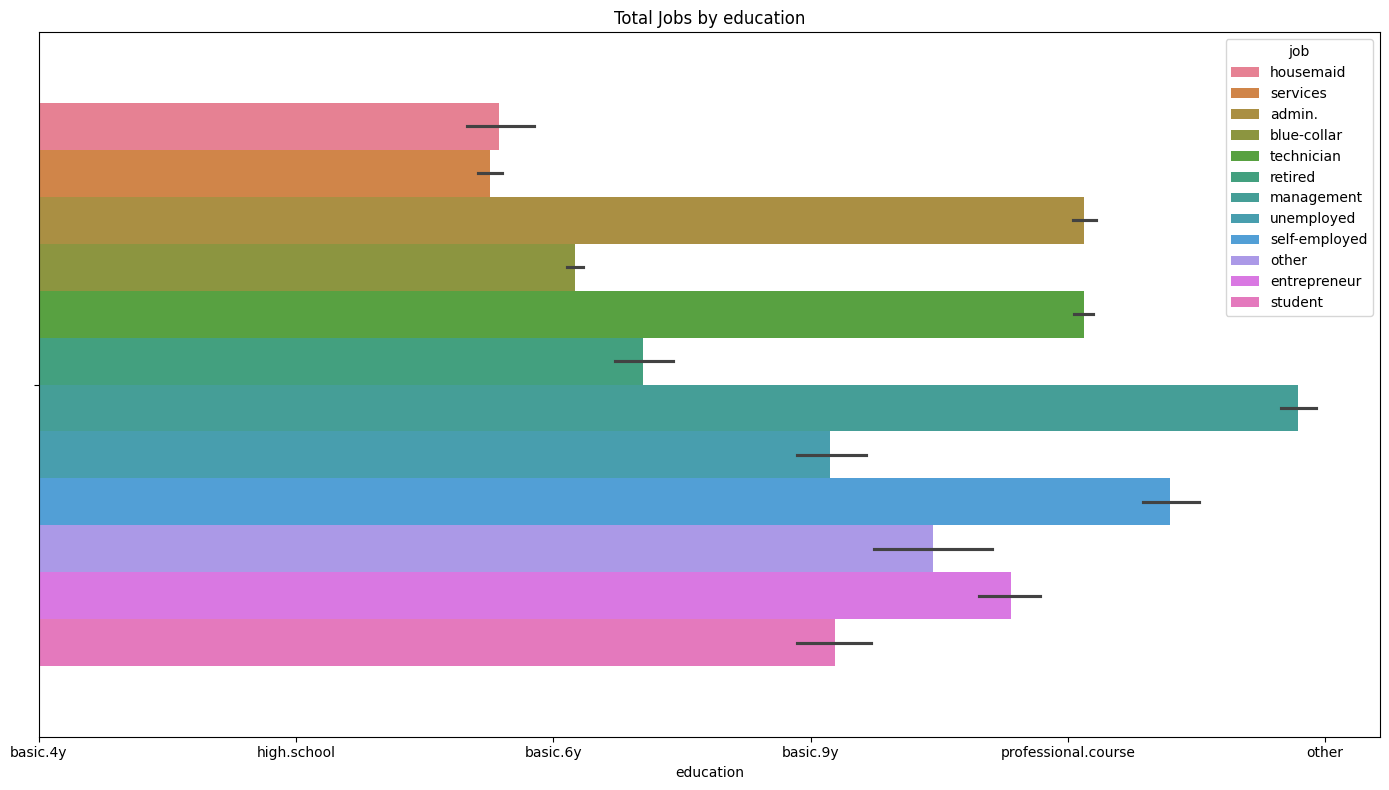

In [314]:
#Jobs by education

plt.figure(figsize=(14, 8))

sns.barplot(data=df, x='education', hue='job')

plt.title('Total Jobs by education')
plt.tight_layout()

plt.show()

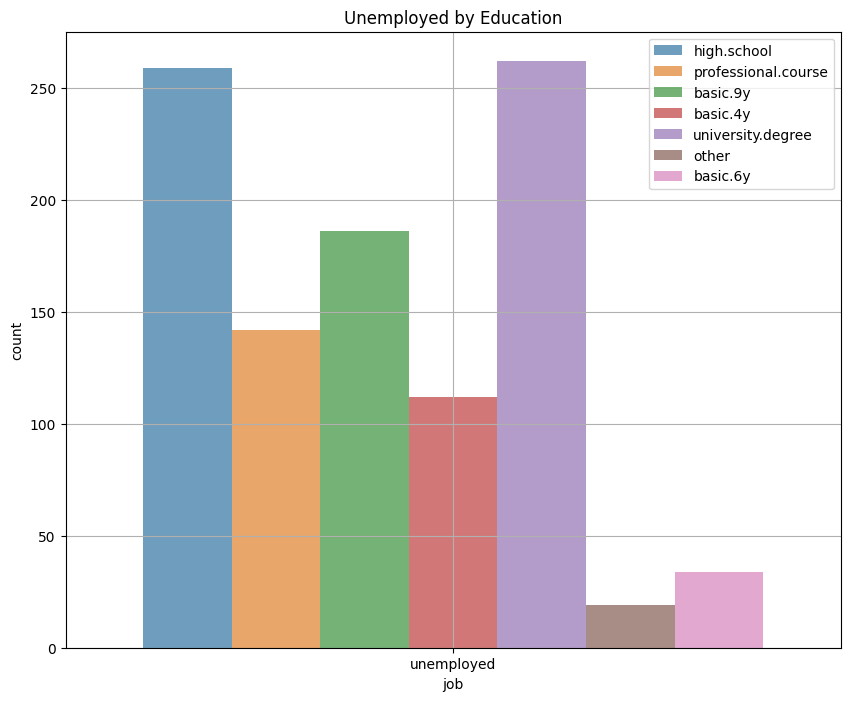

In [315]:
plt.figure(figsize= (10, 8))

df_unemploy = df[df['job'] == 'unemployed']

sns.countplot(data=df_unemploy, x='job', hue='education', alpha=0.7)
plt.title('Unemployed by Education')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

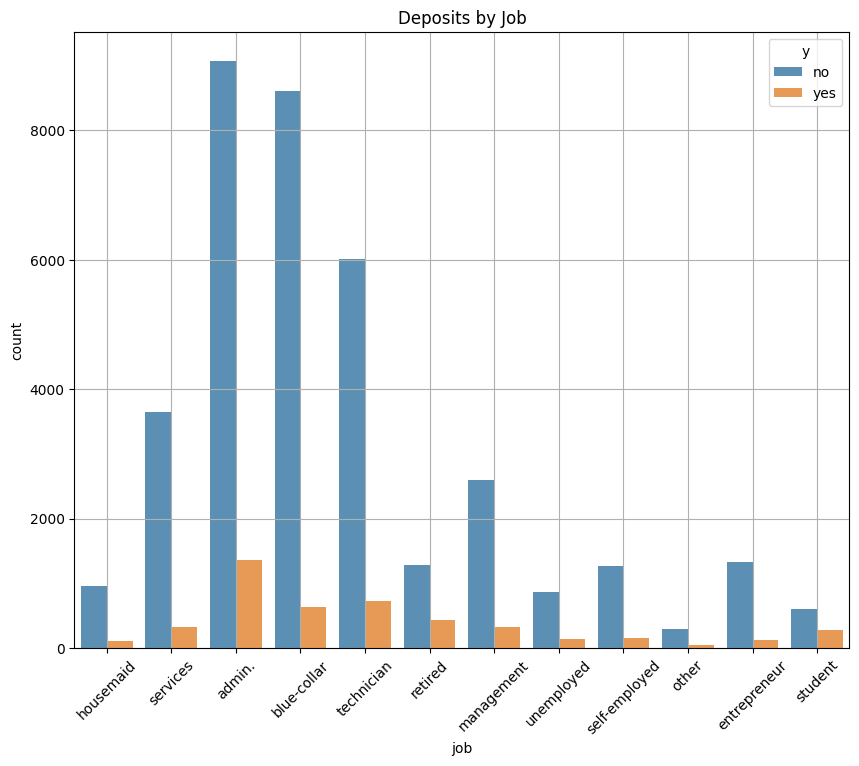

In [316]:
#yes no by job
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x ='job', hue='y', alpha=0.8)

plt.title('Deposits by Job')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

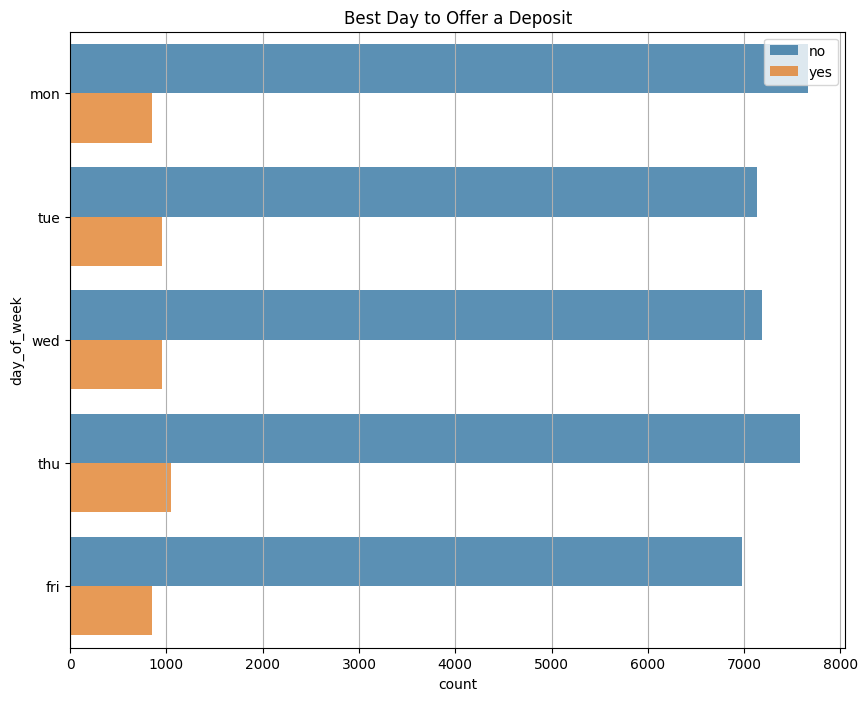

In [317]:
# y no/yes by days of the week

plt.figure(figsize=(10, 8))

sns.countplot(data=df, y='day_of_week', hue='y', alpha=0.8)

plt.title('Best Day to Offer a Deposit')
plt.legend(loc='upper right')
plt.grid(True, axis='x')
plt.show()

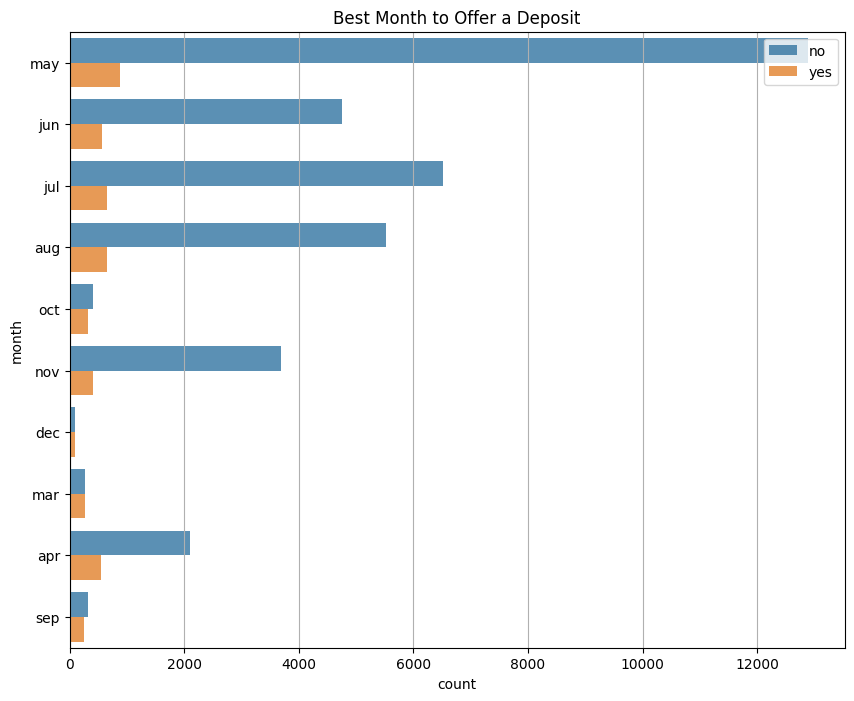

In [318]:
# y no/yes by month

plt.figure(figsize=(10, 8))

sns.countplot(data=df, y='month', hue='y', alpha=0.8)

plt.title('Best Month to Offer a Deposit')
plt.legend(loc='upper right')
plt.grid(True, axis='x')
plt.show()

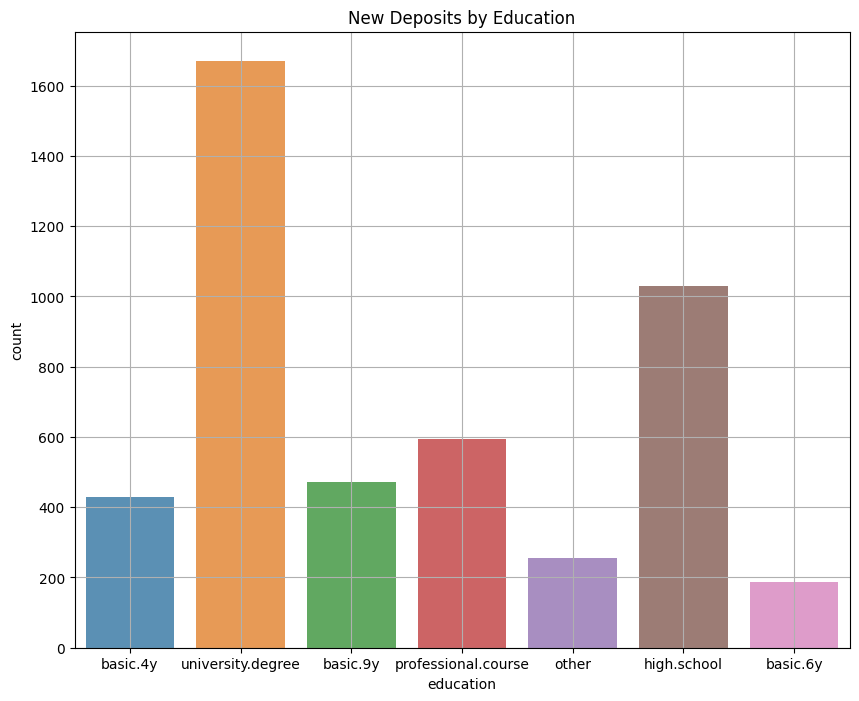

In [319]:
#yes by education
plt.figure(figsize=(10, 8))

df_yes = df[df['y'] == 'yes']

sns.countplot(data=df_yes, x ='education', hue='education', alpha=0.8)

plt.title('New Deposits by Education')
plt.grid(True)
plt.show()

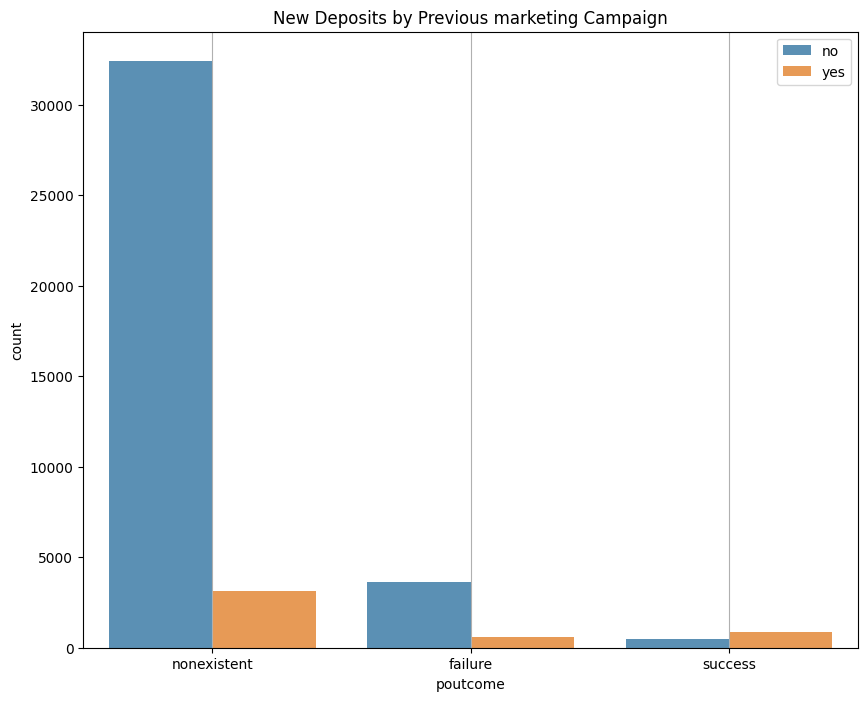

In [320]:
#previous campaing
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x='poutcome', hue='y', alpha=0.8)

plt.title('New Deposits by Previous marketing Campaign')
plt.legend(loc='upper right')
plt.grid(True, axis='x')
plt.show()

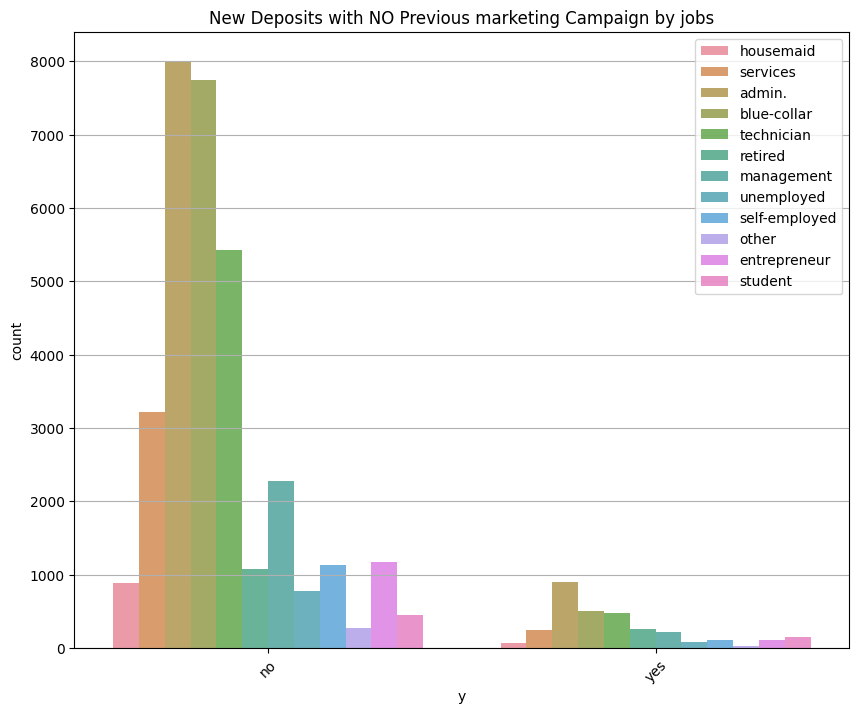

In [321]:
df_no_previous = df[df['poutcome'] == 'nonexistent']

plt.figure(figsize=(10, 8))

sns.countplot(data=df_no_previous, x='y', hue='job', alpha=0.8)

plt.title('New Deposits with NO Previous marketing Campaign by jobs')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True, axis= 'y')
plt.show()

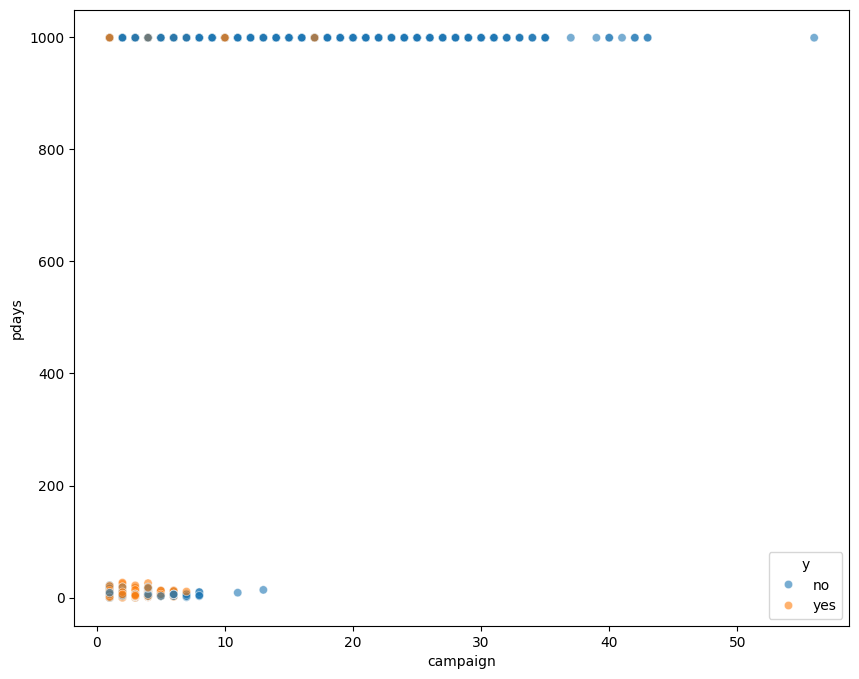

In [322]:

plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='campaign', y='pdays', hue='y', alpha=0.6)

plt.show()

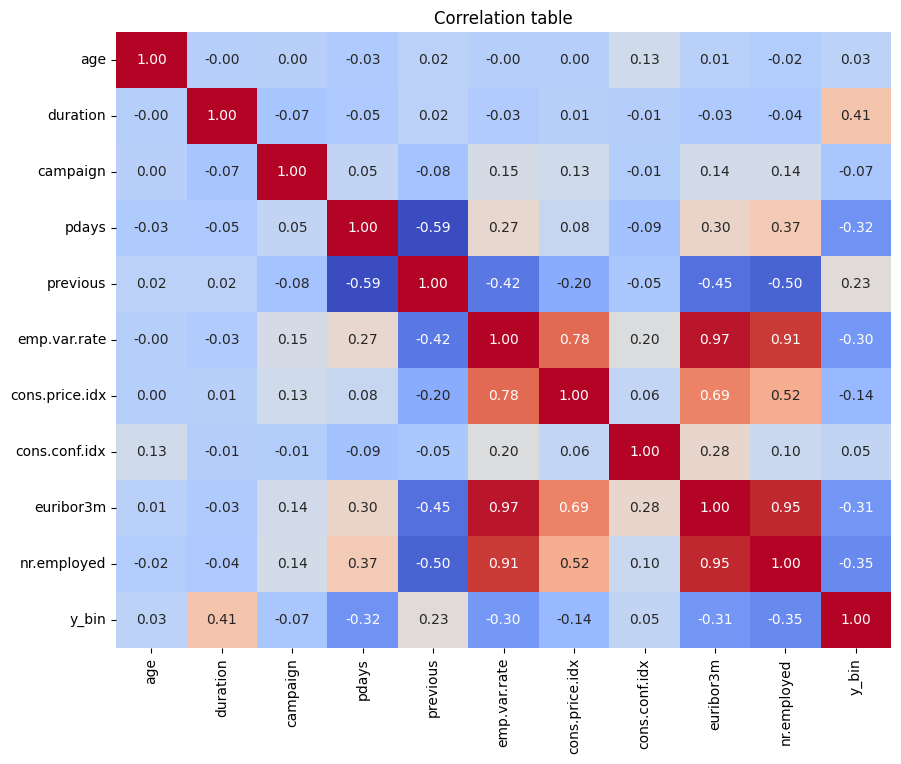

In [323]:
plt.figure(figsize=(10, 8))

df['y_bin'] = df['y'].map({'yes': 1, 'no': 0}) #translates target to binary

corr = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',	'euribor3m', 'nr.employed', 'y_bin']].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cbar=False,
    cmap="coolwarm",
)

plt.title('Correlation table')
plt.show()

In [324]:
#Remove data
df = df.drop(['campaign','duration', 'pdays','emp.var.rate', 'cons.price.idx', 'nr.employed', 'euribor3m'], axis=1)

In [325]:
#categorical to num
df_encoded = df.drop(['y'], axis=1)

encoder = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,cons.conf.idx,y_bin
0,56,3,1,0,0,0,0,1,6,1,0,1,-36.4,0
1,57,8,1,3,1,0,0,1,6,1,0,1,-36.4,0
2,37,8,1,3,0,2,0,1,6,1,0,1,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,0,1,-36.4,0
4,56,8,1,3,0,0,2,1,6,1,0,1,-36.4,0


In [326]:
#train test split

X = df_encoded.drop(['y_bin'], axis = 1)
y = df_encoded['y_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [327]:
#Normalization

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [328]:
#train the model

model = LogisticRegression()

model.fit(X_train, y_train)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [329]:
y_pred = model.predict(X_test)

In [330]:
model.predict_proba(X_test)

array([[0.89906811, 0.10093189],
       [0.96715403, 0.03284597],
       [0.90061427, 0.09938573],
       ...,
       [0.91819961, 0.08180039],
       [0.87948029, 0.12051971],
       [0.93943413, 0.06056587]], shape=(8238, 2))

In [331]:
accuracy_score(y_test, y_pred)

0.8949987861131342

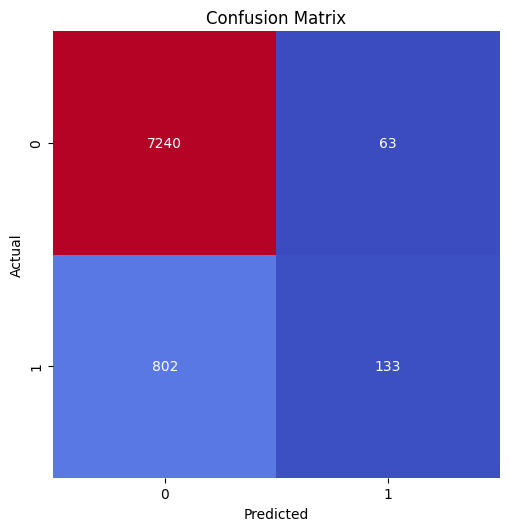

In [332]:
#confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='coolwarm')

plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [333]:
#hyperparams

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}


grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [334]:
grid.fit(X_train, y_train)

grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [335]:
model_grid = LogisticRegression(penalty = "l1", C = 0.1, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.896091284292304

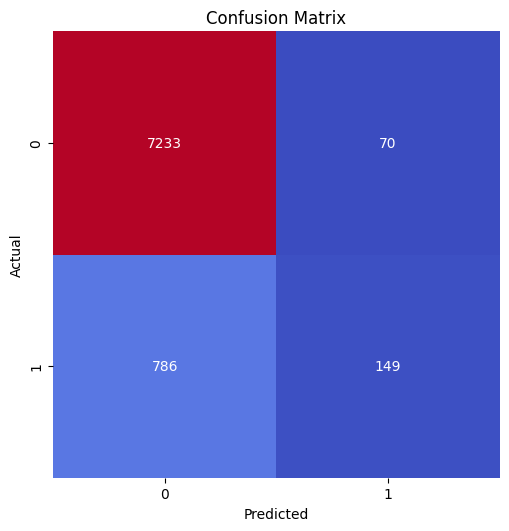

In [336]:
#confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='coolwarm')

plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()